# Running a decision tree

In [38]:
# -*- coding: utf-8 -*-
from pandas import Series, DataFrame
from pandas import *
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

#Load the dataset
data = read_csv("data/marscrater_pds.csv")
data.dropna(inplace=True)
data.head()

,﻿CRATER_ID,CRATER_NAME,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,NUMBER_LAYERS
0,01-000000,,84.367,108.746,82.10,0.22,,,,0
1,01-000001,Korolev,72.760,164.464,82.02,1.97,Rd/MLERS,HuBL,,3
2,01-000002,,69.244,-27.240,79.63,0.09,,,,0
3,01-000003,,70.107,160.575,74.81,0.13,,,,0
4,01-000004,,77.996,95.617,73.53,0.11,,,,0


In [39]:
data.columns

Index([u'﻿CRATER_ID', u'CRATER_NAME', u'LATITUDE_CIRCLE_IMAGE',
       u'LONGITUDE_CIRCLE_IMAGE', u'DIAM_CIRCLE_IMAGE',
       u'DEPTH_RIMFLOOR_TOPOG', u'MORPHOLOGY_EJECTA_1', u'MORPHOLOGY_EJECTA_2',
       u'MORPHOLOGY_EJECTA_3', u'NUMBER_LAYERS'],
      dtype='object')

In [40]:
data.dtypes

﻿CRATER_ID                 object
CRATER_NAME                object
LATITUDE_CIRCLE_IMAGE     float64
LONGITUDE_CIRCLE_IMAGE    float64
DIAM_CIRCLE_IMAGE         float64
DEPTH_RIMFLOOR_TOPOG      float64
MORPHOLOGY_EJECTA_1        object
MORPHOLOGY_EJECTA_2        object
MORPHOLOGY_EJECTA_3        object
NUMBER_LAYERS               int64
dtype: object

In [41]:
data.describe()

,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,NUMBER_LAYERS
count,384343.000000,384343.000000,384343.000000,384343.000000,384343.000000
mean,-7.199209,10.128021,3.556686,0.075838,0.064835
std,33.608966,96.641592,8.591993,0.221518,0.304889
min,-86.700000,-179.997000,1.000000,-0.420000,0.000000
25%,-30.935000,-58.829000,1.180000,0.000000,0.000000
50%,-10.079000,12.740000,1.530000,0.000000,0.000000
75%,17.222500,89.275500,2.550000,0.000000,0.000000
max,85.702000,179.997000,1164.220000,4.950000,5.000000


In [42]:
## our target is going to be whether or not the crater is large
## we're defining large diameter craters as greater than 3 km
data['LARGE_DIAM'] = data.DIAM_CIRCLE_IMAGE >= 3.0
sum(data.LARGE_DIAM == True)

79855

In [43]:
#Split into training and testing sets

predictor_names = ['LATITUDE_CIRCLE_IMAGE', 'LONGITUDE_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG', 'NUMBER_LAYERS']
predictors = data[predictor_names]

target_names = ['LARGE_DIAM']
targets = data[target_names] #.LARGE_DIAM

X_train, X_test, y_train, y_test  =   train_test_split(predictors, targets, test_size=.4)

X_train.shape

(230605, 4)

In [44]:
X_test.shape

(153738, 4)

In [45]:
y_train.shape

(230605, 1)

In [46]:
y_test.shape

(153738, 1)

In [47]:
#Build model on training data
classifier=DecisionTreeClassifier(max_depth=3, min_samples_split=200, min_samples_leaf=200)
classifier=classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)

In [48]:
confmatrix = sklearn.metrics.confusion_matrix(y_test,predictions)
confmatrix = DataFrame(data=confmatrix, 
                       columns=['Actual small crater', 'Actual large crater'],
                       index=['Predicted small crater', 'Predicted large crater'])
confmatrix

,Actual small crater,Actual large crater
Predicted small crater,117898,3954
Predicted large crater,4885,27001


In [49]:
sklearn.metrics.accuracy_score(y_test, predictions)

0.94250608177548811

In [65]:
# -*- coding: utf-8 -*-
#Displaying the decision tree
from sklearn import tree
from io import BytesIO
from IPython.display import Image
import numpy as np
out = BytesIO()
tree.export_graphviz(classifier, out_file=out,feature_names=predictor_names, 
                     class_names=['Small crater', 'Large crater'], filled=True, rounded=True)

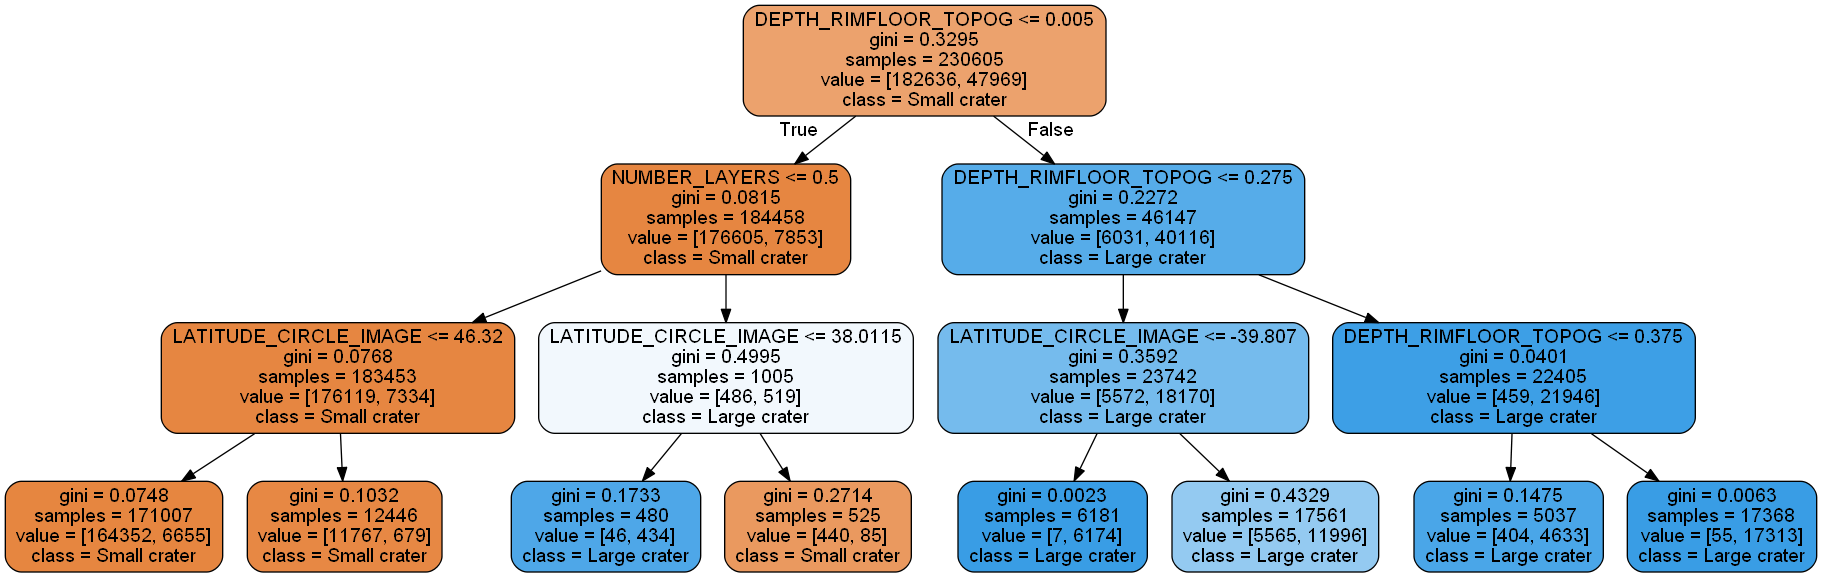

In [68]:
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

In [64]:
f = open('tree.png','wb')
f.write(graph.create_png())
f.close()